<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [22]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


## Importing the Dataset


Reading the chosen dataset into pandas dataframe:


In [23]:
data = pd.read_csv('/Users/canmizrakli/Desktop/CMPE442/assignment 1/Housing.csv')

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The goal for this final project is to predict housing prices using parameters like area, number of bedrooms, bathrooms and stories with binary values like a house being near a mainroad, having guestrooms, having basement, hot water heating and air conditioning. Main objective is to select the best regression model for this dataset and features that give the most suitable results.

# 1. About the Data


This dataset focuses on housing prices and the factors that affect them. The dataset contains the following columns: 'price', 'area', 'bedrooms', 'bathrooms',  'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', and 'airconditioning'. The columns until mainroad are integer values, while the remaining are binary values. The target variable is 'price', which is a continuous variable.

In [4]:
data.info()    # Display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In order to get to know the data beter, here are some statistics and visual representations.

In [5]:
summary_stats = data.describe()

summary_stats

# The summary statistics of the dataset are displayed above.

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


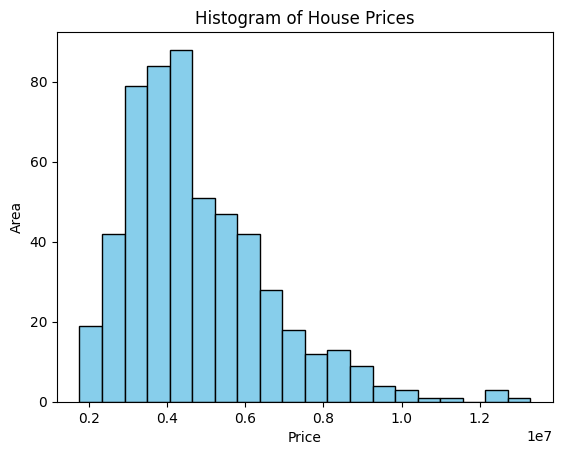

In [6]:
# First we start with an histogram of the target variable 'price'

plt.hist(data['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Histogram of House Prices')
plt.show()


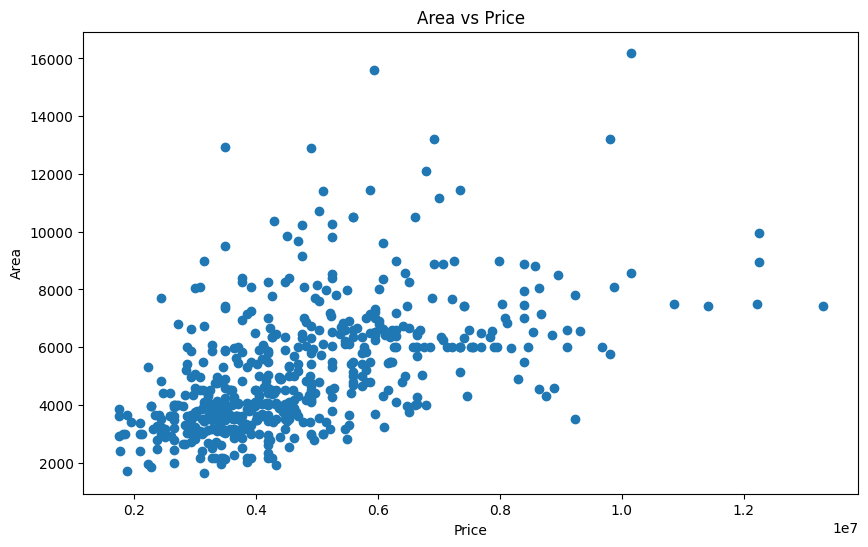

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data['area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Area vs Price')
plt.show()

# The scatter plot below indicates that there is a positive 
# correlation between the area and the price of a house.


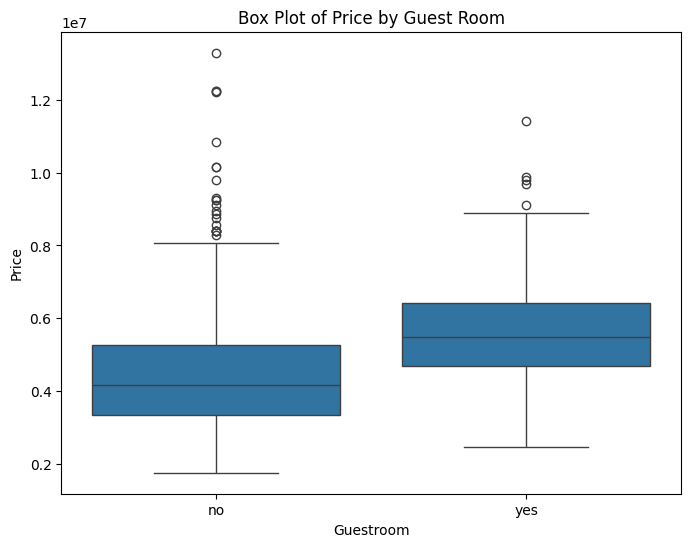

In [8]:
# Next, we create a box plot of 'bedrooms' vs. 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x='guestroom', y='price', data=data)
plt.xlabel('Guestroom')
plt.ylabel('Price')
plt.title('Box Plot of Price by Guest Room')
plt.show()

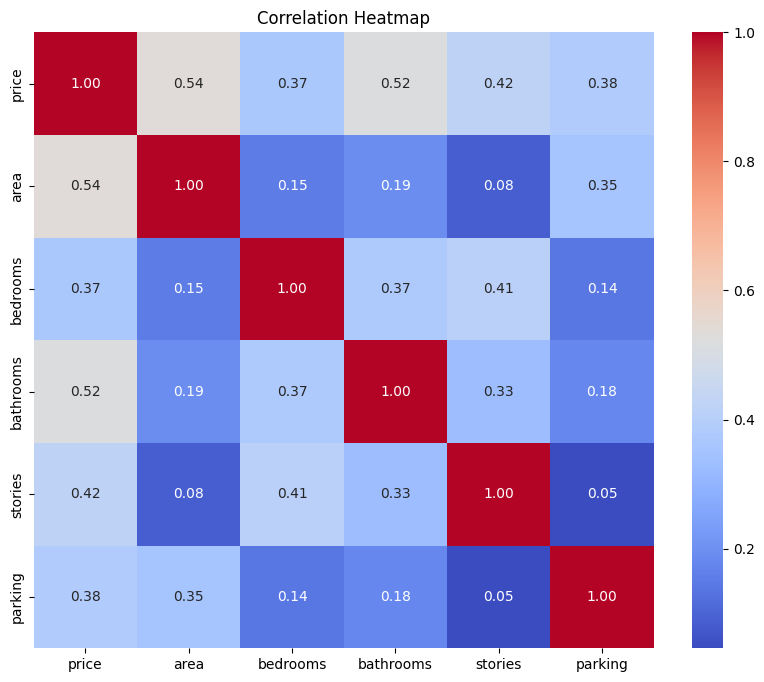

In [9]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Compute pairwise correlations between numerical variables
correlation_matrix = numerical_columns.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Since we do not care about the correlation between features like stories and bathrooms, we eliminate those and just look at features' correlation with price since it is the target variable of this project.

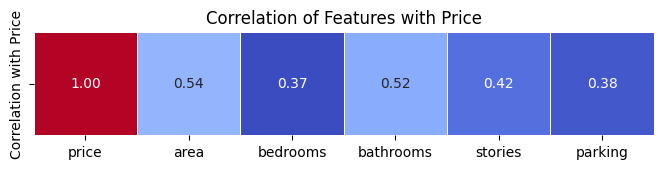

In [24]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Compute correlation coefficients between 'price' and the features
price_correlation = numerical_columns.corrwith(data['price'])

# Create a dataframe with correlation coefficients
price_correlation_df = pd.DataFrame(price_correlation, columns=['Correlation with Price'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation_df.transpose(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=False, linewidths=0.5)
plt.title('Correlation of Features with Price')
plt.show()

# Pre-processing: Feature selection/extraction

First we drop the columns that are not relevant to our desired model which only takes account to area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hot water and air conditioning.

In [25]:
data = data.drop('furnishingstatus', axis=1)    # Drop the column 'furnishingstatus' from the dataset
data = data.drop('parking', axis=1)    # Drop the column 'parking' from the dataset
data = data.drop('prefarea', axis=1)    # Drop the column 'prefarea' from the dataset

data.head()    # Display the first five rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,yes,no,no,no,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes
2,12250000,9960,3,2,2,yes,no,yes,no,no
3,12215000,7500,4,2,2,yes,no,yes,no,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes


In [26]:
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})

data.head()

# Turn categorical variables into dummy variables that can be used for calculations

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,1,0,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1
4,11410000,7420,4,1,2,1,1,1,0,1


In [27]:
X = data.drop('price', axis=1)    # Define the feature matrix X
y = data['price']    # Define the target variable y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Train set: ", X_train.shape, y_train.shape) 
print("Test set: ", X_test.shape, y_test.shape)

Training set has 436 samples.
Testing set has 109 samples.
Train set:  (436, 9) (436,)
Test set:  (109, 9) (109,)


# 2. Objectives


For the model testing we will be working with three different models:

1. Linear Regression: suits the testing for its simplicity, interpretability, and ability to model the linear relationship between independent variables (housing characteristics) and a continuous dependent variable (housing prices).

2. Polynomial Regression: chosen to capture more complex relationships between independent and dependent variables that may not be adequately modeled by linear regression, allowing for non-linear patterns in the data to be captured.

3. Regularization: chosen to prevent overfitting by penalizing the magnitude of coefficients, promoting simpler models with improved generalization performance.

# 3. Linear Regression Models


1. Linear Regression

* First create the LR object.
* Use the train set to train the model
* Calculate predictions on test sets
* Calculate MSE and find most suitable C values accordingly

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {format(mse_lr, '.4e')}")

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C_values:
    clf = SVR(C=c)
    clf.fit(X_train, y_train)
    y_pred_lr = clf.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    print(f"Mean Squared Error (C values = {c}): {format(mse_lr, '.4e')}")

Mean Squared Error: 1.9971e+12
Mean Squared Error (C values = 0.001): 5.5680e+12
Mean Squared Error (C values = 0.01): 5.5680e+12
Mean Squared Error (C values = 0.1): 5.5680e+12
Mean Squared Error (C values = 1): 5.5679e+12
Mean Squared Error (C values = 10): 5.5674e+12
Mean Squared Error (C values = 100): 5.5616e+12


Let's find the equation and plot our linear regression model

Linear Regression Equation:
y =  -294537.1279110601 + 280.08967742378763 * area + 118972.86197378836 * bedrooms + 1119867.4339262545 * bathrooms + 402936.9711343595 * stories + 612703.8974717666 * mainroad + 257501.76191424535 * guestroom + 537474.8545848074 * basement + 730701.2102741064 * hotwaterheating + 874350.0221257904 * airconditioning 


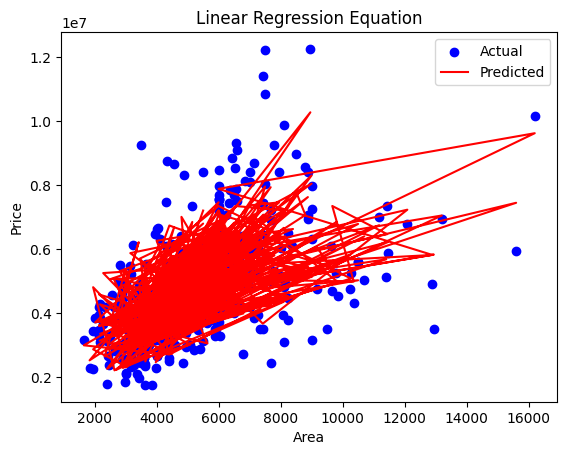

In [28]:
# Get the coefficients and intercept
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# Print the linear regression equation
print("Linear Regression Equation:")
print("y = ", intercept, end=" ")
for i in range(len(coefficients)):
    print("+", coefficients[i], "*", X_train.columns[i], end=" ")
print()

# Define the x-values
x = X_train['area']

# Calculate the predicted y-values using the linear regression equation
y_pred_lr = intercept + coefficients[0] * X_train['area'] + coefficients[1] * X_train['bedrooms'] + coefficients[2] * X_train['bathrooms'] + coefficients[3] * X_train['stories'] + coefficients[4] * X_train['mainroad'] + coefficients[5] * X_train['guestroom'] + coefficients[6] * X_train['basement'] + coefficients[7] * X_train['hotwaterheating'] + coefficients[8] * X_train['airconditioning']

# Plot the actual & predicted data points
plt.scatter(X_train['area'], y_train, color='blue', label='Actual')
plt.plot(x, y_pred_lr, color='red', label='Predicted')

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Equation')
plt.legend()
plt.show()

* As it can clearly be seen, this model is extremely overfitting.

2. Polynomial Regression

* Extract predictor 'area' (X) and target 'price' (y), reshape X to ensure 2D array.
* Use PolynomialFeatures to create polynomial features up to degree = 4.
* Split dataset into training and testing sets.
* Fit linear regression model to polynomial features.
* Predict target variable for test dataset.
* Plot actual vs. predicted target values.

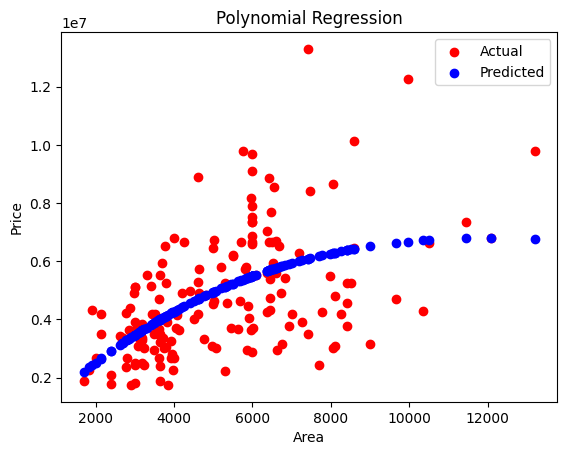

In [29]:
X = data['area'].values.reshape(-1,1)
y = data['price'].values

# transform X to polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred_pr = model.predict(X_test)

# plot
plt.scatter(X_test[:,1], y_test, color='red', label='Actual')
plt.scatter(X_test[:,1], y_pred_pr, color='blue', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
mae = mean_absolute_error(y_test, y_pred_pr)
mse_pr = mean_squared_error(y_test, y_pred_pr)
rmse = np.sqrt(mse_pr)
r2 = r2_score(y_test, y_pred_pr)

print("Mean Absolute Error (MAE):", {format(mae, '.4e')})
print("Mean Squared Error (MSE):", {format(mse_pr, '.4e')})
print("Root Mean Squared Error (RMSE):", {format(rmse, '.4e')})
print("R-squared (R2):", {format(r2, '.4e')})

Mean Absolute Error (MAE): {'1.3540e+06'}
Mean Squared Error (MSE): {'3.1243e+12'}
Root Mean Squared Error (RMSE): {'1.7676e+06'}
R-squared (R2): {'2.7451e-01'}


* As observed, this model underfits the dataset.

3. Regularization

* First, alpha is set to 1

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge Regression model
ridge1 = Ridge(alpha=1.0)

# Train the model using the training set
ridge1.fit(X_train_scaled, y_train)

# Use the trained model to predict the test set
y_pred_reg1 = ridge1.predict(X_test_scaled)

# Calculate the Mean Squared Error of the model
mse_reg1 = mean_squared_error(y_test, y_pred_reg1)

# Print the MSE in the form of 10^x
print(f"Mean Squared Error: {format(mse_reg1, '.4e')}")

Mean Squared Error: 3.1407e+12


* Next, alpha is set to 3

In [31]:
ridge3 = Ridge(alpha=1.0)

ridge3.fit(X_train_scaled, y_train)

y_pred_reg3 = ridge3.predict(X_test_scaled)

mse_reg3 = mean_squared_error(y_test, y_pred_reg1)

print(f"Mean Squared Error: {format(mse_reg3, '.4e')}")

Mean Squared Error: 3.1407e+12


* Finally, alpha is set to 5

In [32]:
ridge5 = Ridge(alpha=1.0)

ridge5.fit(X_train_scaled, y_train)

y_pred_reg5 = ridge5.predict(X_test_scaled)

mse_reg5 = mean_squared_error(y_test, y_pred_reg5)

print(f"Mean Squared Error: {format(mse_reg5, '.4e')}")

Mean Squared Error: 3.1407e+12


As alpha increased, mse increased as well.

# 4. Insights and key findings


* Let's plot some graphs in order to understand how our different models gave error values.

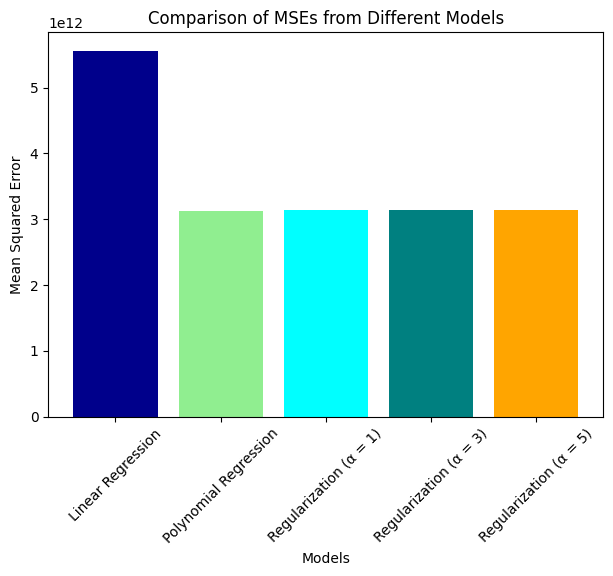

In [34]:
mse_values = {'Linear Regression': mse_lr, 'Polynomial Regression': mse_pr, 'Regularization (α = 1)': mse_reg1, 'Regularization (α = 3)': mse_reg3, 'Regularization (α = 5)': mse_reg5}

# bar graph
plt.bar(mse_values.keys(), mse_values.values(), color=['darkblue', 'lightgreen', 'cyan', 'teal', 'orange'])

# labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSEs from Different Models')

# plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

When the values in the graph are observed, it can be extremely clear that for this dataset and implementation of the regression models, Linear Regression turned out to be the worst choice compared to the other models which are Polynomial Regression and Regularization. All MSE values can be considered extremely high but Linear Regression doubles over the other ones. This situation indicates that Linear Regression could not make the specific ties between features that were needed to make less error-prone predictions. On the other hand, the models that produced lower MSE values turned out to be really close to each other and a key outcome from that perspective might be that as α increased, MSE increased as well. Still, Polynomial Regression and Regularization were better at understanding the ties between features and the target but there is a huge room for improvement even if the other MSE values are lower than Linear Regression.

# 5. Next Steps


Next steps on improving these models using this dataset might be considered as solving problems such as overfitting that was faced with Linear Regression by increasing the dataset, adding more features and decreasing complexity. While working with Polynomial Regression in order to improve the results increasing the dataset and model complexity would also work. To conclude, the next step is to implement regression methods in a way that would decrease the error and understand how the features' and the target's connection effect each other so that less error-prone and accurate predictions can be made. 

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
